In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM,Conv1D,MaxPool1D,Dropout,Flatten

from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
import joblib

In [37]:
!pipreqsnb . --force

pipreqs  --force .


INFO: Not scanning for jupyter notebooks.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in .\requirements.txt


# Data Understanding

In [3]:
path = r"C:\Users\MSI-GAMING\.cache\kagglehub\datasets\mlg-ulb\creditcardfraud\versions\3\creditcard.csv"

df = pd.read_csv(path)
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Statistik

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


## Cek Skew

In [6]:
for i, col in enumerate(df.columns[1:-1]):
    skew_value = skew(df[col])
    print(f"Variabel {col} skew = {skew_value:.4f}")

Variabel V1 skew = -3.2807
Variabel V2 skew = -4.6248
Variabel V3 skew = -2.2401
Variabel V4 skew = 0.6763
Variabel V5 skew = -2.4259
Variabel V6 skew = 1.8266
Variabel V7 skew = 2.5539
Variabel V8 skew = -8.5219
Variabel V9 skew = 0.5547
Variabel V10 skew = 1.1871
Variabel V11 skew = 0.3565
Variabel V12 skew = -2.2784
Variabel V13 skew = 0.0652
Variabel V14 skew = -1.9952
Variabel V15 skew = -0.3084
Variabel V16 skew = -1.1010
Variabel V17 skew = -3.8449
Variabel V18 skew = -0.2599
Variabel V19 skew = 0.1092
Variabel V20 skew = -2.0371
Variabel V21 skew = 3.5930
Variabel V22 skew = -0.2133
Variabel V23 skew = -5.8751
Variabel V24 skew = -0.5525
Variabel V25 skew = -0.4158
Variabel V26 skew = 0.5767
Variabel V27 skew = -1.1702
Variabel V28 skew = 11.1920
Variabel Amount skew = 16.9776


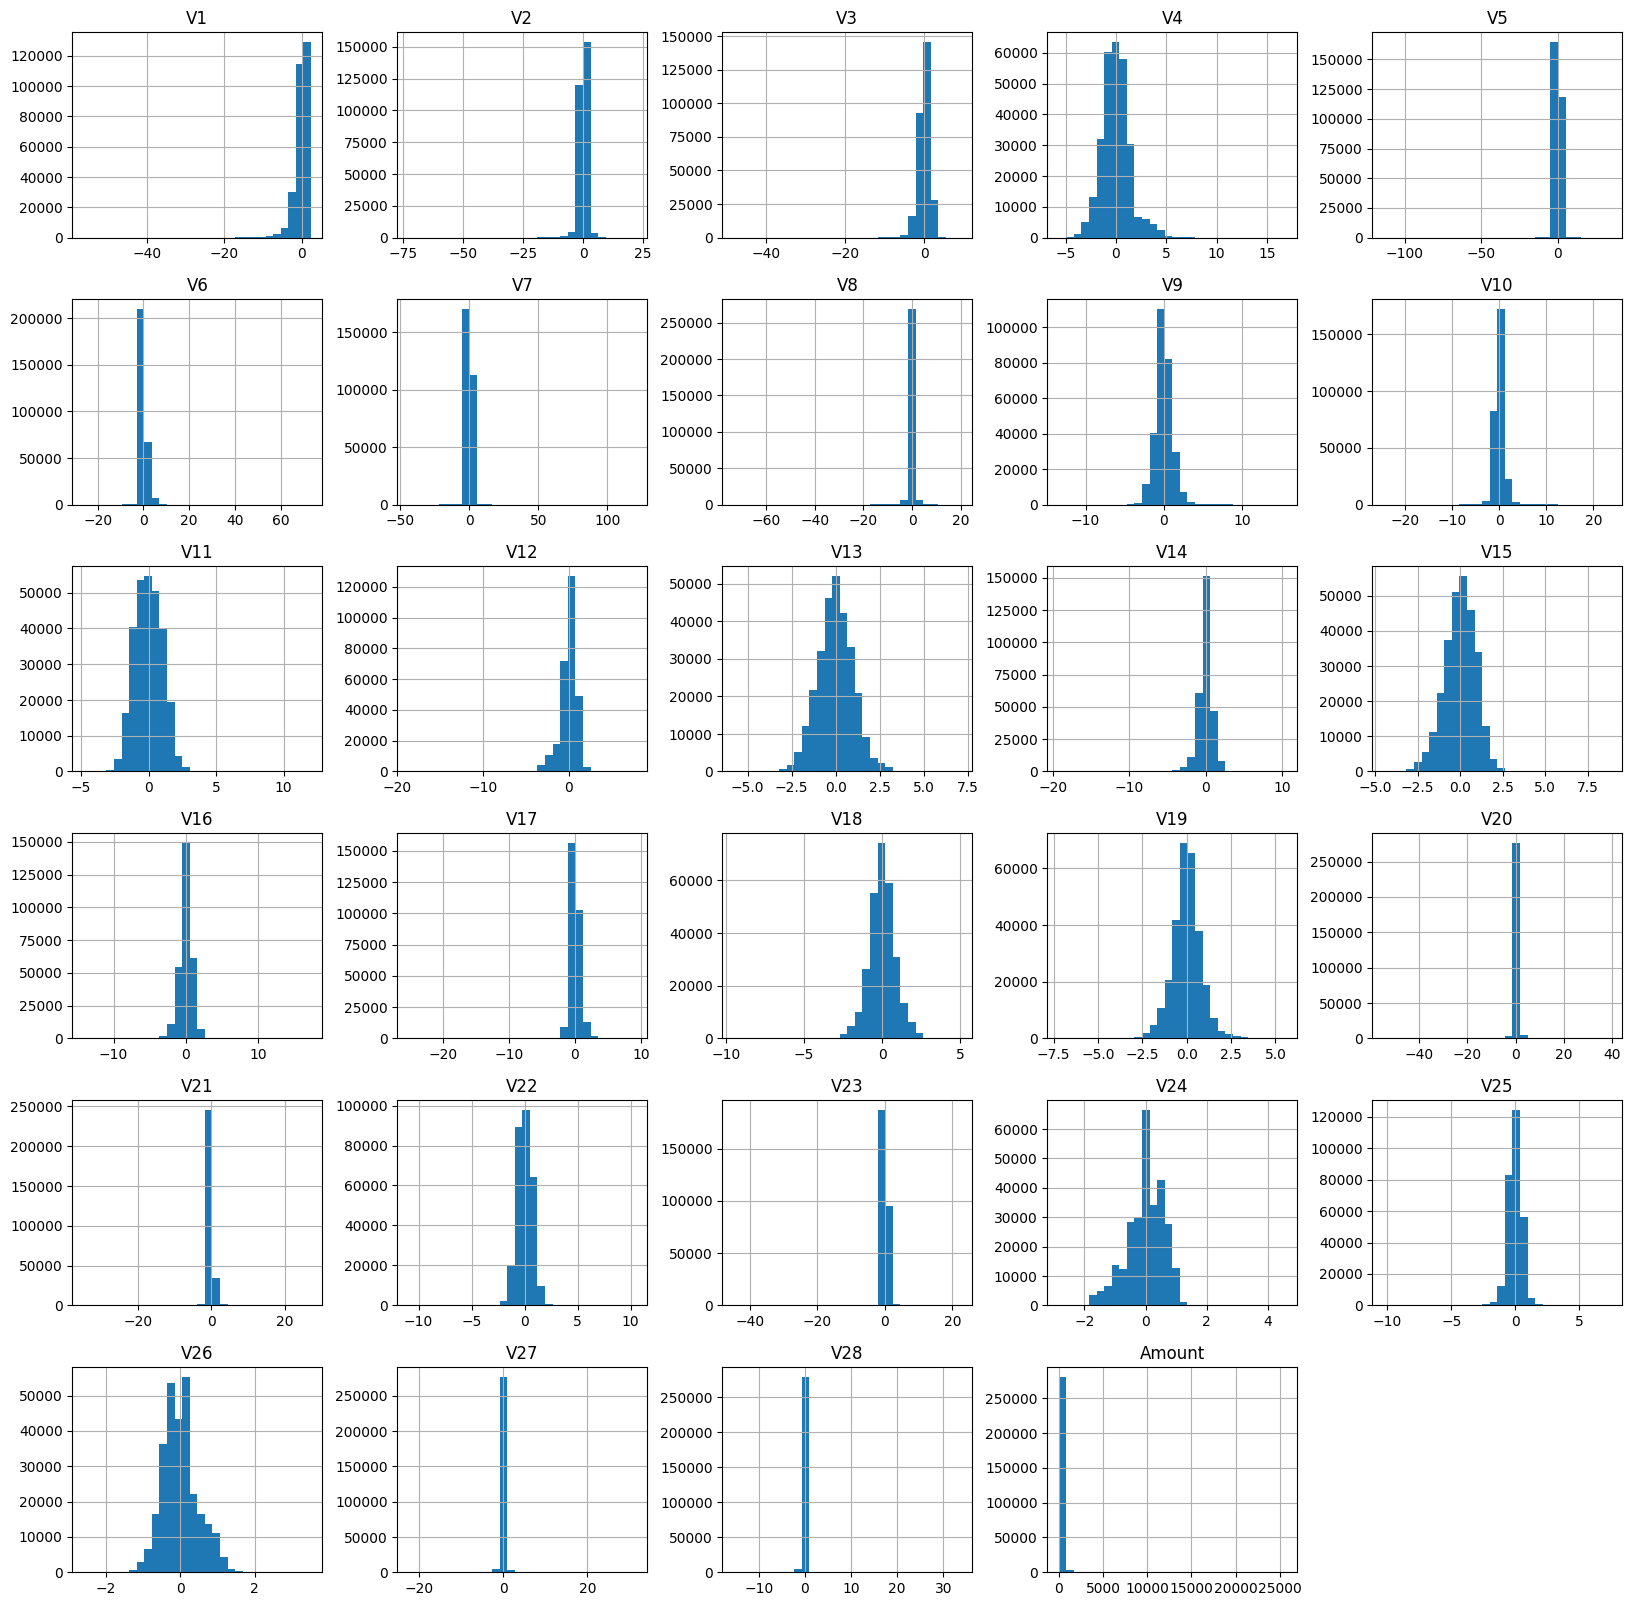

In [7]:
col = df[df.columns[1:-1]]

df[col.T.index].hist(bins = 30, figsize = (20,20))
plt.show()

## Cek Frekuensi Kelas

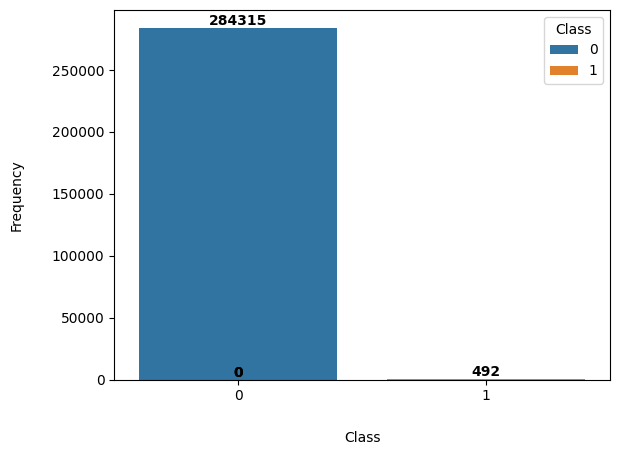

In [8]:
ax = sns.countplot(data = df, x = 'Class', hue = 'Class')

for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',  # Nilai yang ditampilkan
        (p.get_x() + p.get_width() / 2, p.get_height()),  # Posisi anotasi
        ha='center',  # Posisi horizontal
        va='bottom',  # Posisi vertikal
        fontsize=10,  
        fontweight='bold',
        color='black'
    )

plt.xlabel('Class', labelpad = 20)
plt.ylabel('Frequency', labelpad = 20)
plt.show()

## Cek Korelasi

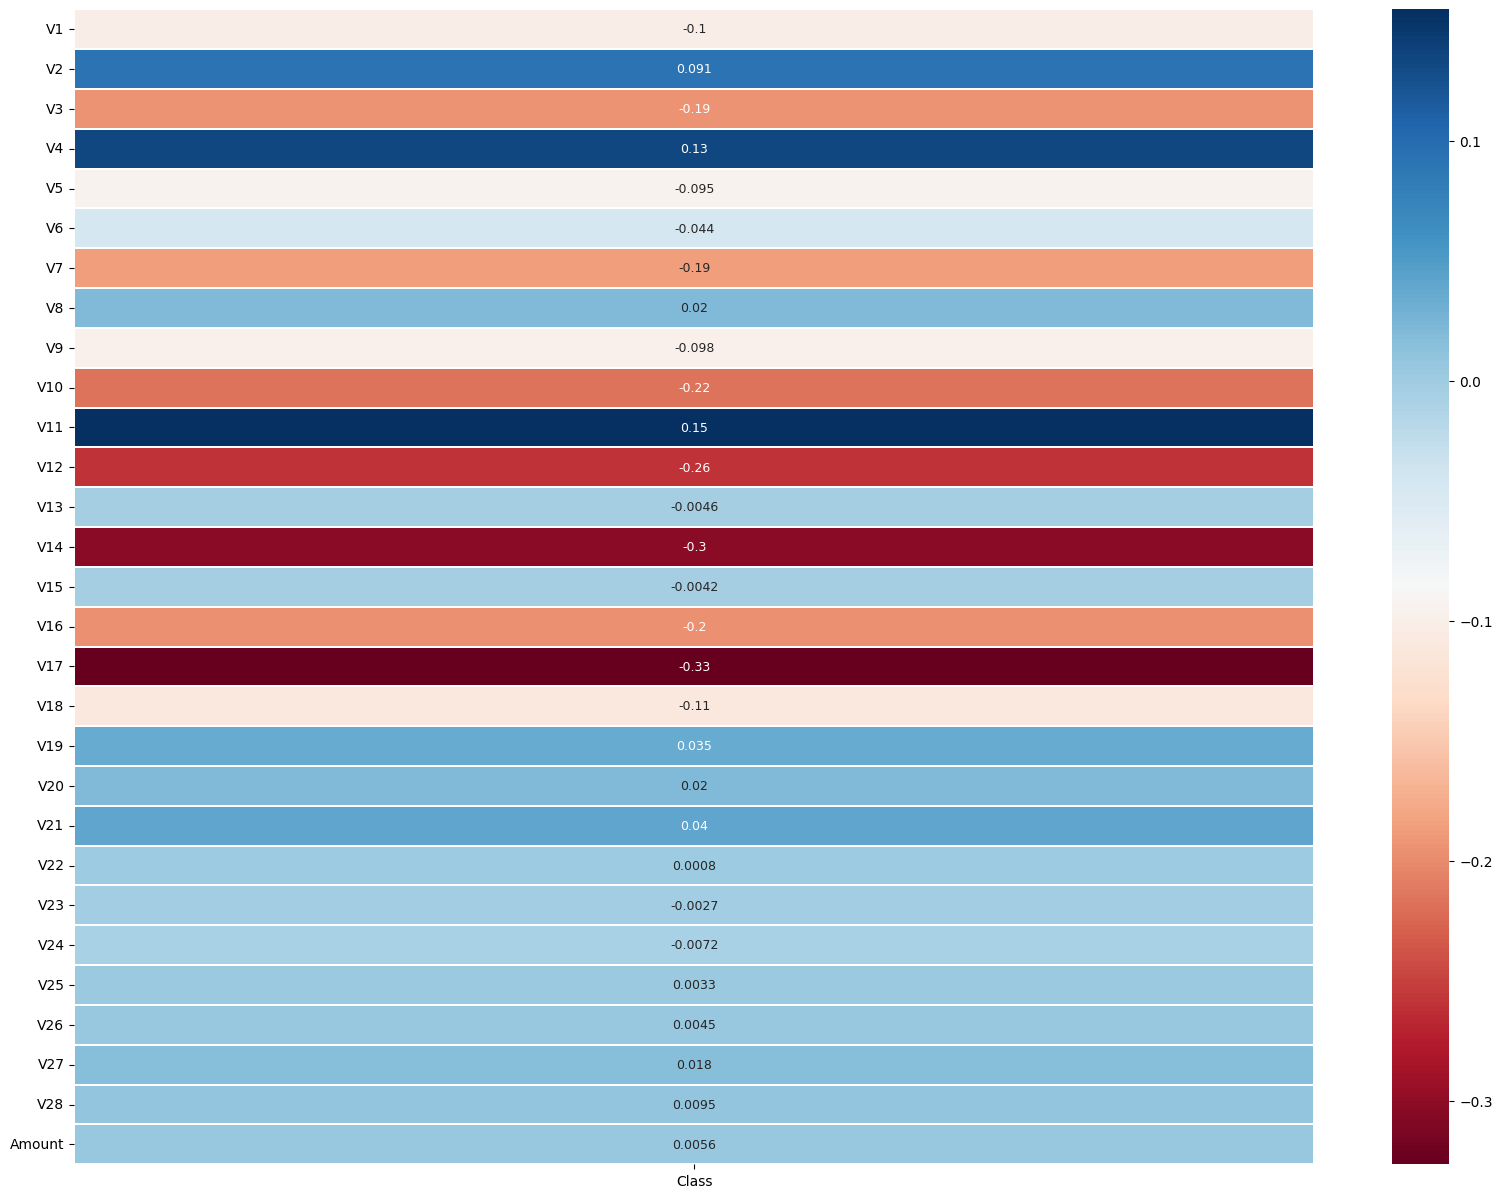

In [9]:
df_cor = pd.DataFrame(np.round(df[df.columns[1:]].corr(),4).iloc[:-1,-1])

plt.figure(figsize=(20,15))
sns.heatmap(df_cor, annot = True, annot_kws = {'fontsize':9}, cmap = 'RdBu', linewidth = 0.05)
plt.show()

In [ ]:
df.iloc[0,:].values

# Data Preparation

## Feature Selection

In [10]:
feature_cor_selection = df_cor[(df_cor['Class'] <= -0.1) | (df_cor['Class'] >= 0.1)].index
feature_cor_selection

Index(['V1', 'V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17',
       'V18'],
      dtype='object')

In [11]:
df_selection = df[feature_cor_selection]
df_selection['Class'] = df['Class'].values

C:\Users\MSI-GAMING\AppData\Local\Temp\ipykernel_29556\203345398.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selection['Class'] = df['Class'].values


## Handling Skew

In [12]:
pt = PowerTransformer(method='yeo-johnson')
value_handling_skew = pt.fit_transform(df_selection[feature_cor_selection])
df_selection[feature_cor_selection] = value_handling_skew

for i,col in enumerate(df_selection.columns[:-1]):
    #df_selection[col] = np.log1p(df_selection[col])
    print(f"Nilai Skew {col} = {skew(df_selection[col])}")

Nilai Skew V1 = -0.2180022012377965
Nilai Skew V3 = -0.07997963309565222
Nilai Skew V4 = 0.01893013003743481
Nilai Skew V7 = 2.5945609669816916
Nilai Skew V10 = -1.318326552604179
Nilai Skew V11 = 0.060889516960965034
Nilai Skew V12 = 0.15893164236095936
Nilai Skew V14 = 0.1059651393310001
Nilai Skew V16 = 0.13743648891441446
Nilai Skew V17 = -0.7911368160327443
Nilai Skew V18 = -0.05962983029857595


C:\Users\MSI-GAMING\AppData\Local\Temp\ipykernel_29556\2458845818.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selection[feature_cor_selection] = value_handling_skew


In [13]:
df_selection

,V1,V3,V4,V7,V10,V11,V12,V14,V16,V17,V18,Class
0,-0.904815,2.176074,0.983588,0.193516,0.127074,-0.513088,-0.774671,-0.404755,-0.600774,0.215544,0.009991,0
1,0.626390,-0.035062,0.387928,-0.063874,-0.115195,1.523934,1.296242,-0.232720,0.491958,-0.175639,-0.238612,0
2,-0.904242,1.381297,0.341811,0.639714,0.234324,0.640742,-0.104954,-0.255865,-2.809663,1.383126,-0.165261,0
3,-0.742857,1.401049,-0.581136,0.191907,-0.008922,-0.179270,0.026987,-0.381222,-1.194700,-0.829186,2.435570,0
4,-0.823641,1.160592,0.357540,0.479194,0.718432,-0.798770,0.496185,-1.168769,-0.580731,-0.319406,-0.066425,0
...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-3.432267,-4.220558,-1.593107,-3.973235,3.576063,-1.638541,4.513387,6.636511,1.366639,2.599479,0.598715,0
284803,-0.639272,1.646499,-0.481818,0.019492,-0.918591,-0.102484,1.056661,-0.760490,-0.850454,-0.069378,-1.434874,0
284804,1.309171,-1.858341,-0.340111,-0.240095,-0.423945,0.442295,-0.108344,-0.602451,0.087492,0.346990,0.457715,0
284805,-0.395844,0.391172,0.547954,-0.554756,-0.339755,-2.021233,-1.053638,0.433222,-0.744928,0.595704,1.349868,0


In [14]:
df_selection.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,284807.0,-3.512709e-17,1.000002,-8.474209,-0.722984,-0.248960,0.735777,1.868337
V3,284807.0,-7.344756e-17,1.000002,-13.017494,-0.712354,-0.025126,0.673837,11.432547
V4,284807.0,1.836189e-17,1.000002,-5.019738,-0.569404,0.063182,0.582842,8.543672
V7,284807.0,7.983430e-19,1.000002,-35.152211,-0.448000,0.032243,0.460997,97.689206
V10,284807.0,-6.686123e-18,1.000002,-31.852784,-0.474036,-0.044775,0.455951,16.284968
V11,284807.0,1.916023e-17,1.000002,-5.427618,-0.734699,0.014393,0.746595,9.462558
V12,284807.0,-1.117680e-17,1.000002,-7.242896,-0.586810,-0.018749,0.609404,19.718315
V14,284807.0,3.991715e-19,1.000002,-12.180383,-0.519046,-0.024500,0.485347,17.750993
V16,284807.0,1.684005e-17,1.000002,-10.242725,-0.598278,-0.001580,0.569026,35.347139
V17,284807.0,9.979288e-18,1.000002,-21.545973,-0.603542,-0.117215,0.455479,14.040849


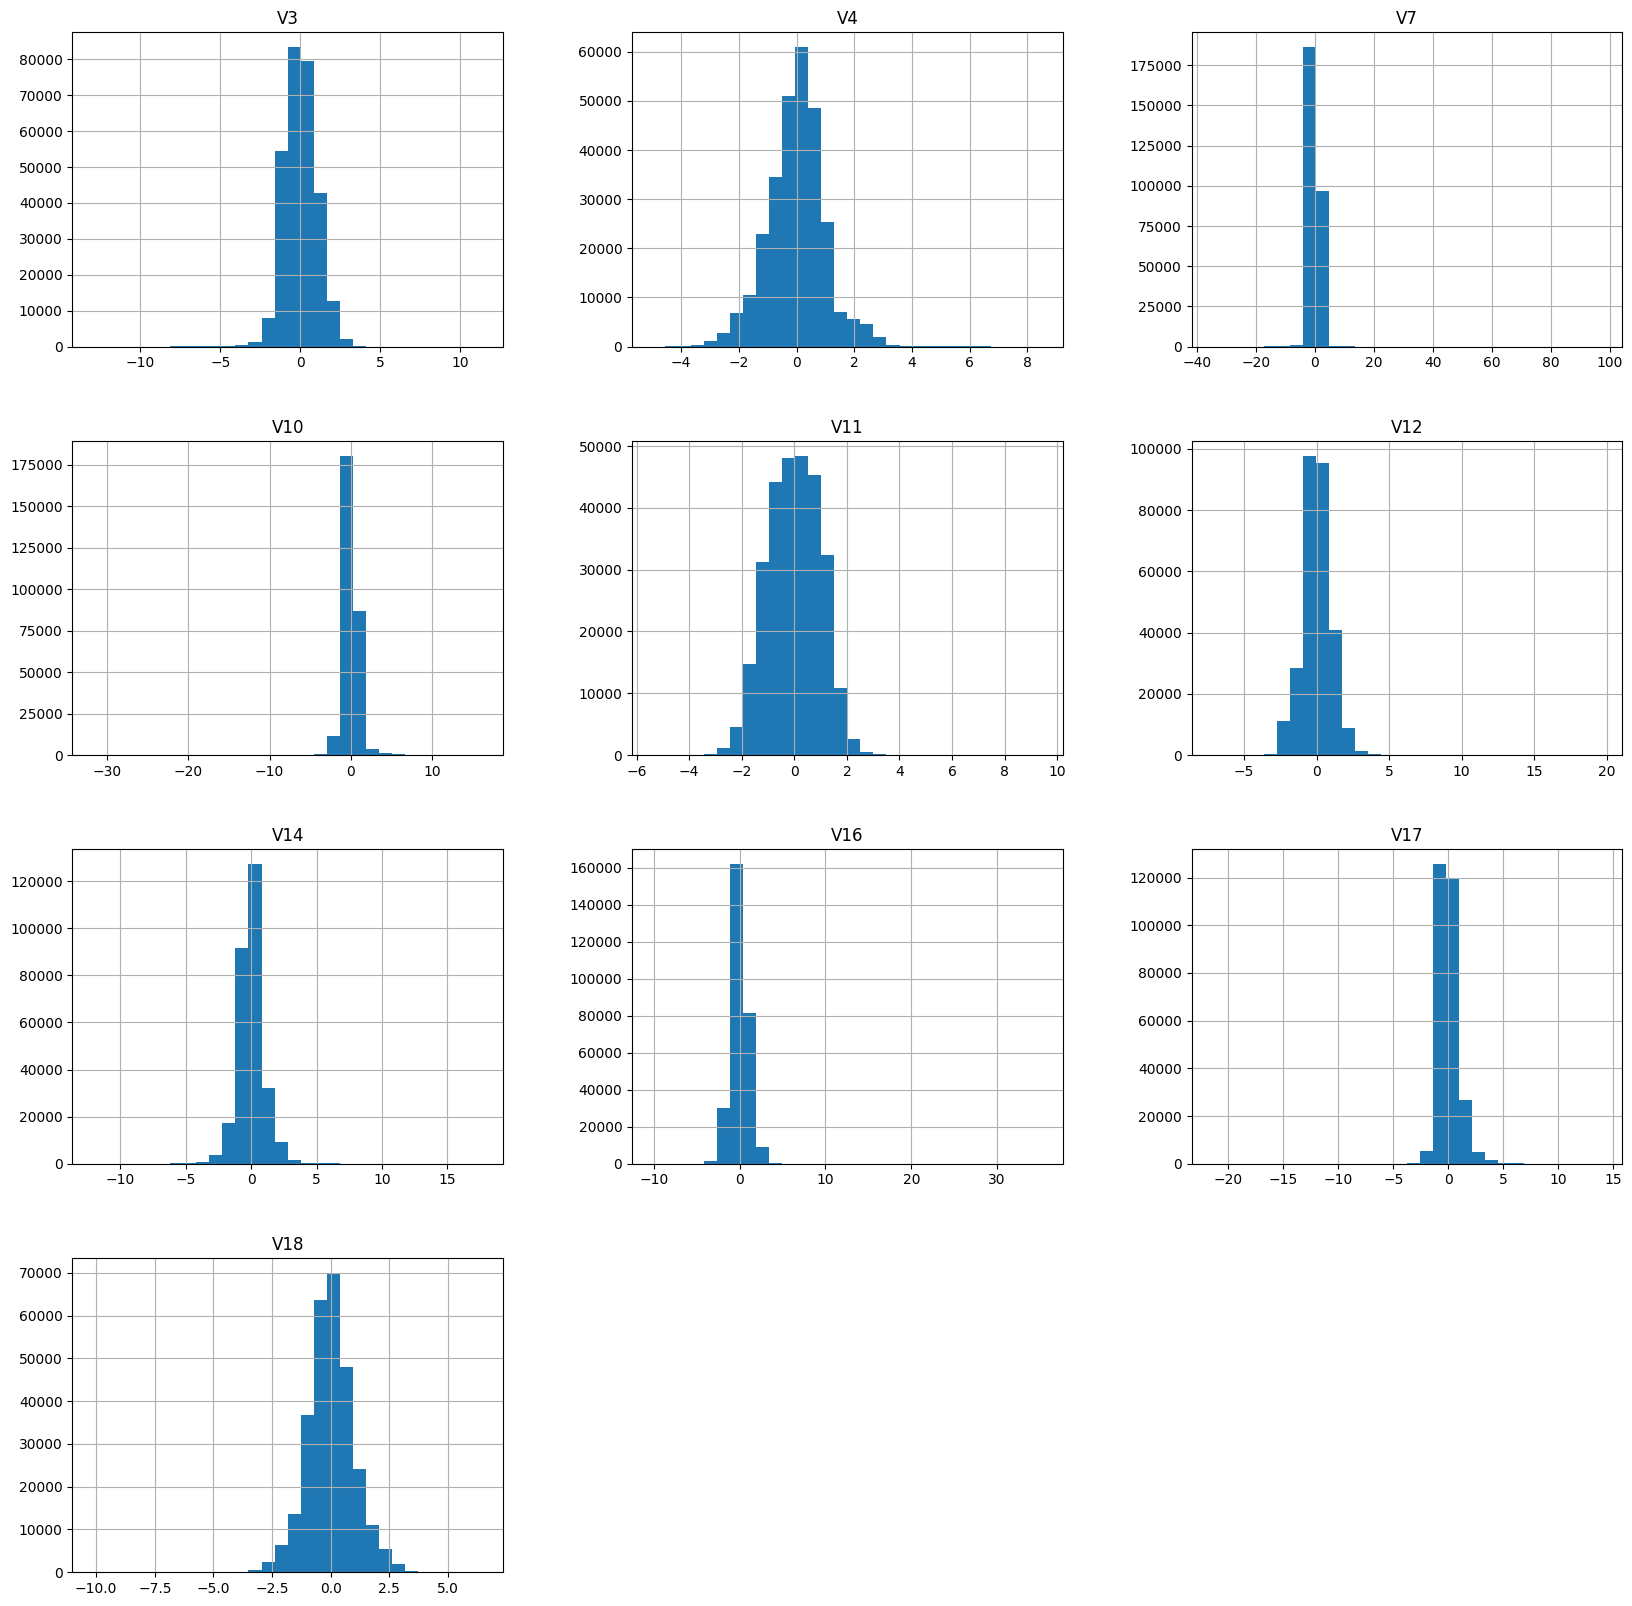

In [15]:
col = df_selection[df_selection.columns[1:-1]]

df_selection[col.T.index].hist(bins = 30, figsize = (20,20))
plt.show()

In [40]:
with open("skew.pkl", "wb") as model_skew:
    joblib.dump(pt, model_skew)

## Normalisasi

C:\Users\MSI-GAMING\AppData\Local\Temp\ipykernel_29556\1155401042.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selection[feature_cor_selection] = hasil_scaler


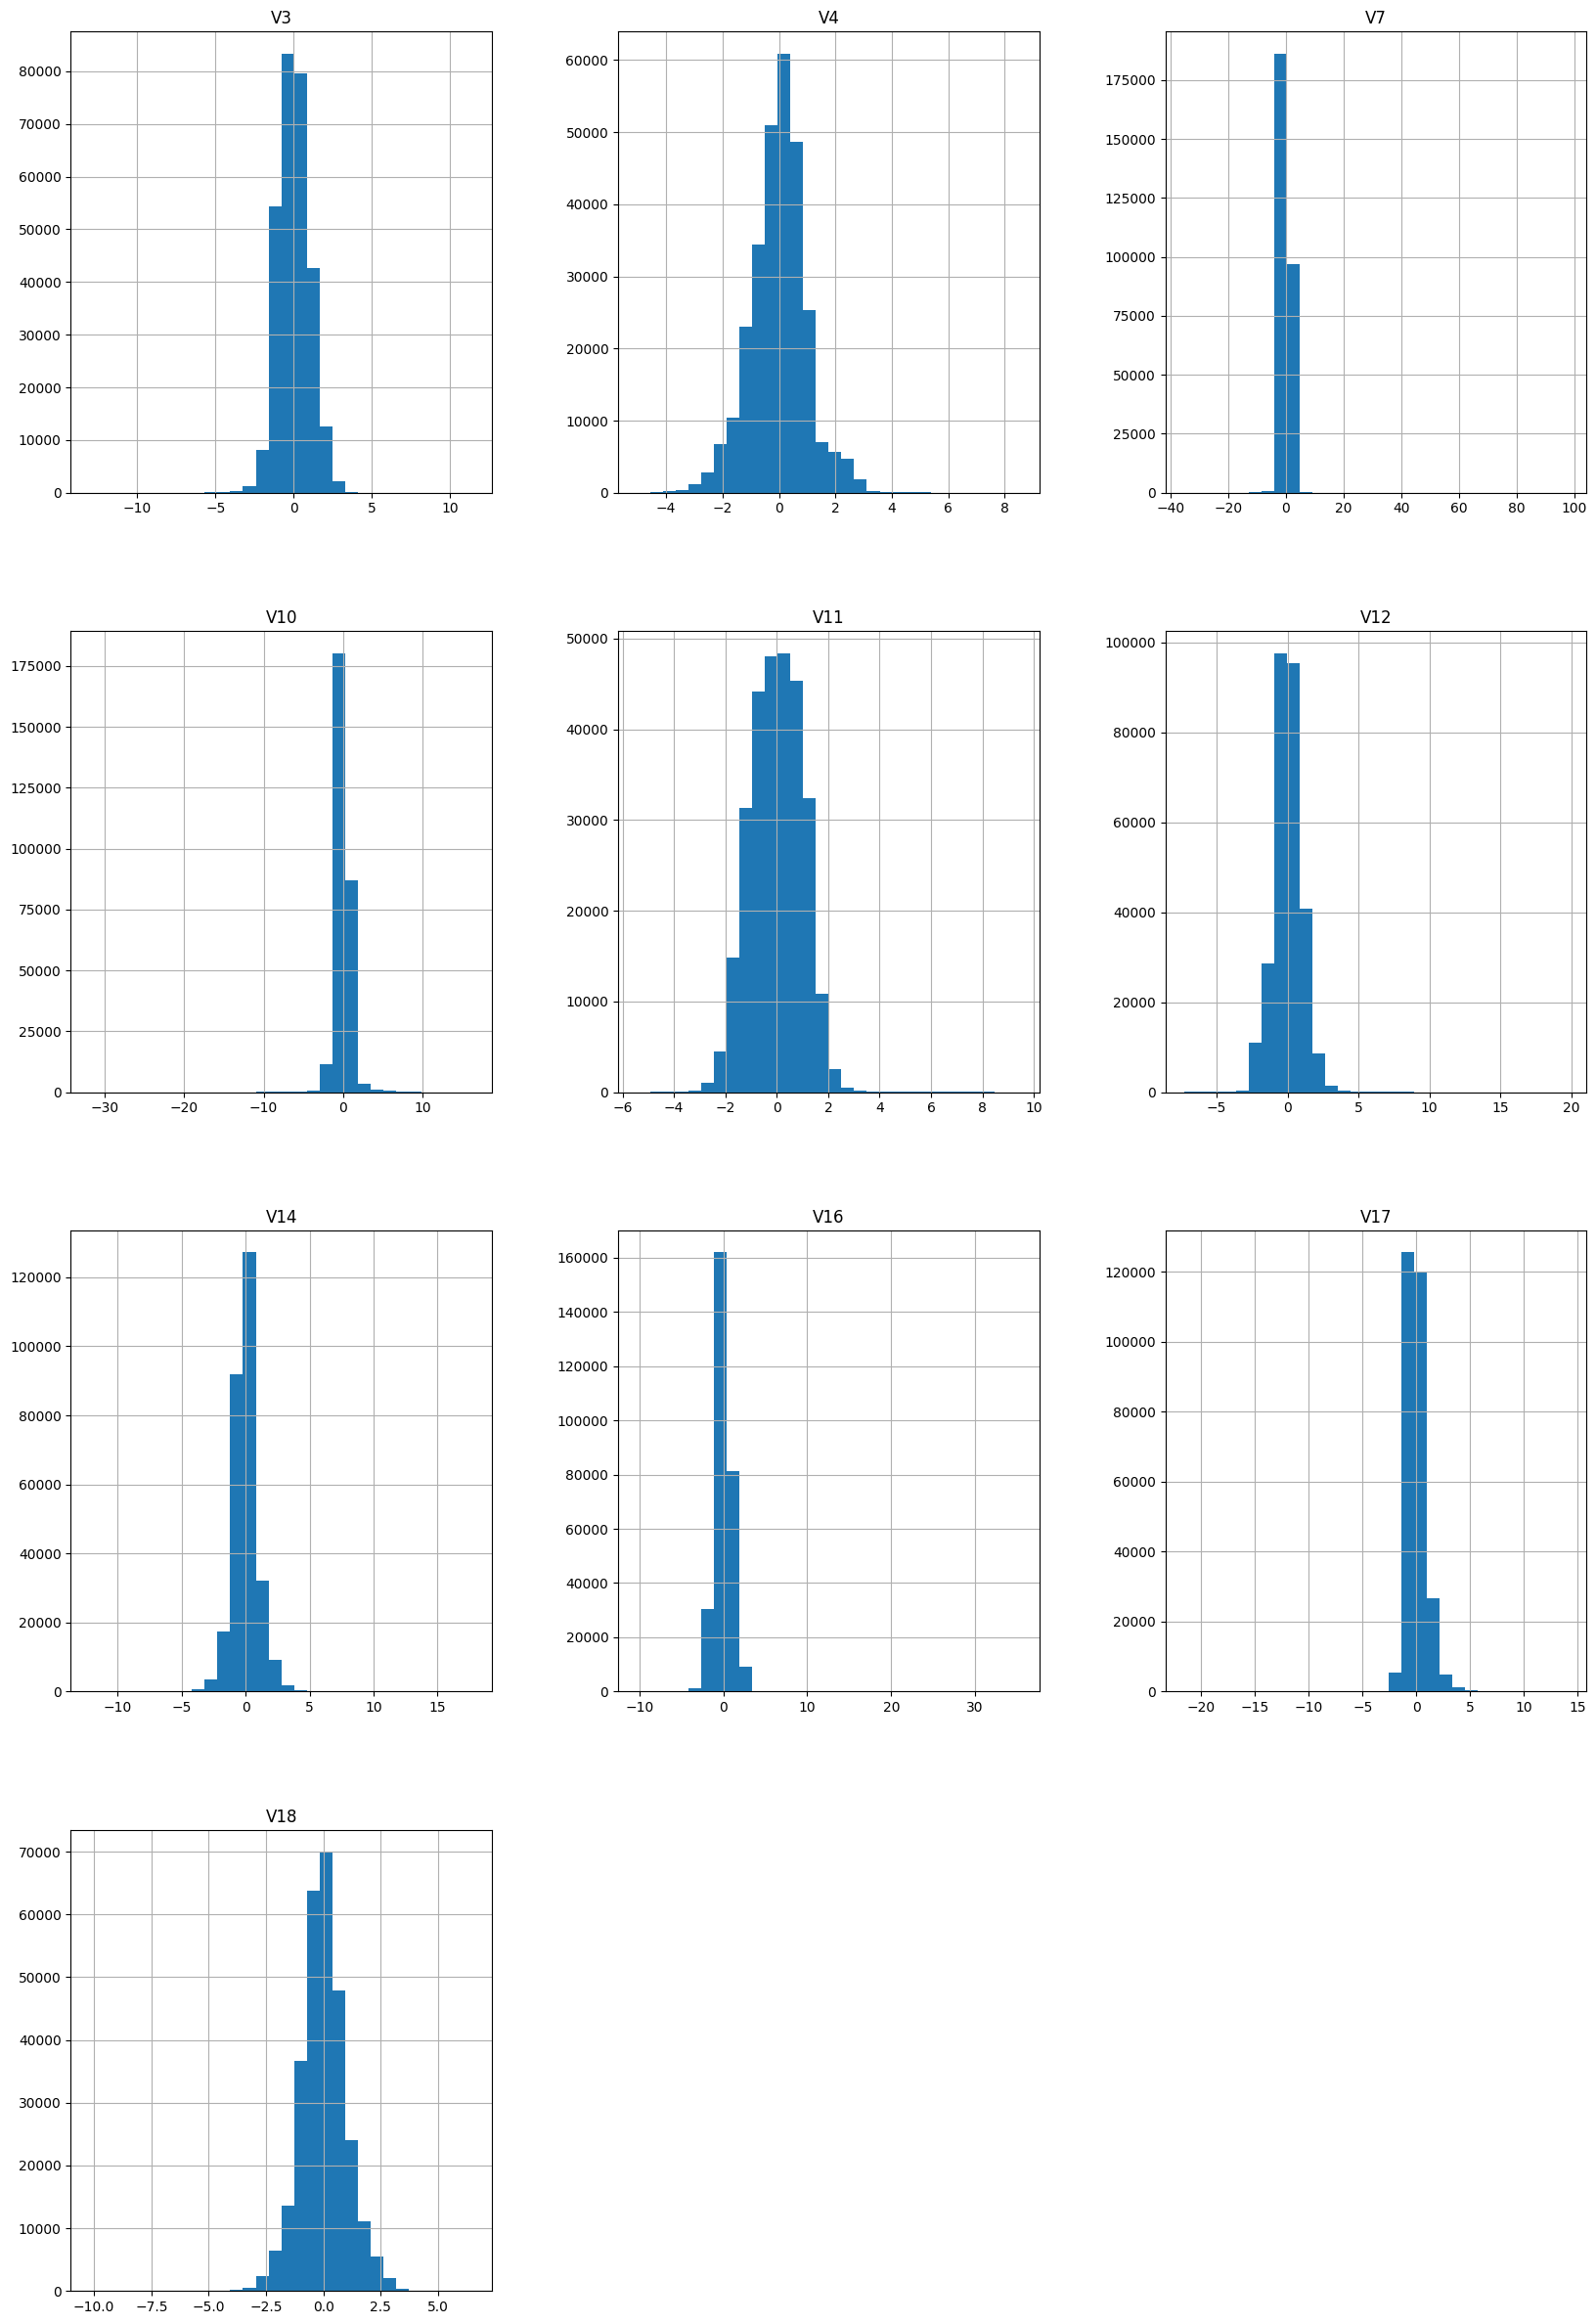

In [16]:
scaler = StandardScaler()
hasil_scaler = scaler.fit_transform(df_selection[feature_cor_selection])
df_selection[feature_cor_selection] = hasil_scaler
col = df_selection[df_selection.columns[1:-1]]

df_selection[col.T.index].hist(bins = 30, figsize=(20,30))
plt.show()

In [17]:
df_selection.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,284807.0,-4.390887e-17,1.000002,-8.474209,-0.722984,-0.248960,0.735777,1.868337
V3,284807.0,1.437017e-17,1.000002,-13.017494,-0.712354,-0.025126,0.673837,11.432547
V4,284807.0,1.676520e-17,1.000002,-5.019738,-0.569404,0.063182,0.582842,8.543672
V7,284807.0,1.995858e-18,1.000002,-35.152211,-0.448000,0.032243,0.460997,97.689206
V10,284807.0,-5.089437e-18,1.000002,-31.852784,-0.474036,-0.044775,0.455951,16.284968
V11,284807.0,1.277349e-17,1.000002,-5.427618,-0.734699,0.014393,0.746595,9.462558
V12,284807.0,-6.386744e-18,1.000002,-7.242896,-0.586810,-0.018749,0.609404,19.718315
V14,284807.0,3.991715e-19,1.000002,-12.180383,-0.519046,-0.024500,0.485347,17.750993
V16,284807.0,1.137639e-17,1.000002,-10.242725,-0.598278,-0.001580,0.569026,35.347139
V17,284807.0,9.779702e-18,1.000002,-21.545973,-0.603542,-0.117215,0.455479,14.040849


In [41]:
with open("scaler.pkl", "wb") as model_scaler:
    joblib.dump(scaler, model_scaler)

## Handling Imbalance Class

In [18]:
X = df_selection.drop(columns = 'Class')
y = df_selection['Class']

model_imba = ADASYN(n_neighbors = 10)

X_res, y_res = model_imba.fit_resample(X,y)

C:\Users\MSI-GAMING\anaconda3\envs\credit_fraud\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [19]:
pca = PCA(n_components = 2)
feature_viz = pca.fit_transform(X)
feature_viz_imba = pca.fit_transform(X_res)

df_viz_ori = pd.DataFrame(feature_viz, columns = ['PCA1','PCA2'])
df_viz_imba = pd.DataFrame(feature_viz_imba, columns = ['PCA1','PCA2'])

df_viz_ori['Class_ori'] = y.values
df_viz_imba['Class_imba'] = y_res.values

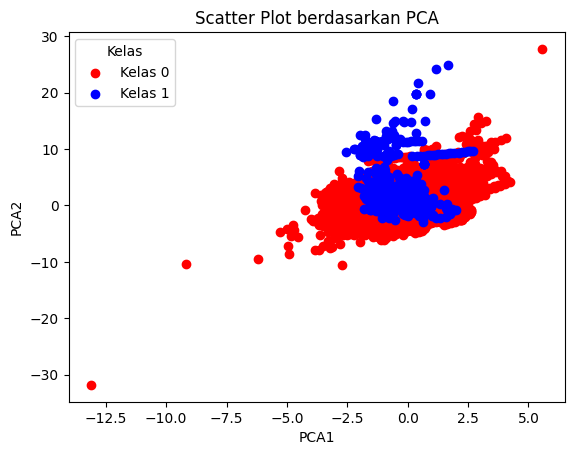

In [20]:
X_ori = df_viz_ori[['PCA1','PCA2']].values
y_ori = df_viz_ori['Class_ori'].values

colors = {0: 'red', 1: 'blue'}

for kelas, data in df_viz_ori.groupby("Class_ori"):
    plt.scatter(data["PCA1"], data["PCA2"], color=colors[kelas], label=f"Kelas {kelas}")

plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("Scatter Plot berdasarkan PCA")
plt.legend(title="Kelas")

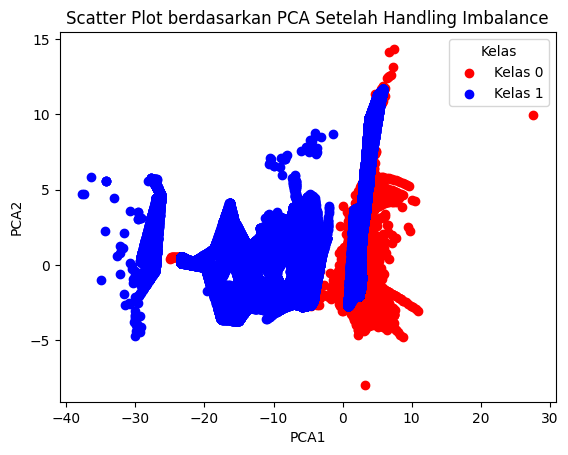

In [21]:
X_ori = df_viz_imba[['PCA1','PCA2']].values
y_ori = df_viz_imba['Class_imba'].values

colors = {0: 'red', 1: 'blue'}

for kelas, data in df_viz_imba.groupby("Class_imba"):
    plt.scatter(data["PCA1"], data["PCA2"], color=colors[kelas], label=f"Kelas {kelas}")

plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("Scatter Plot berdasarkan PCA Setelah Handling Imbalance")
plt.legend(title="Kelas")

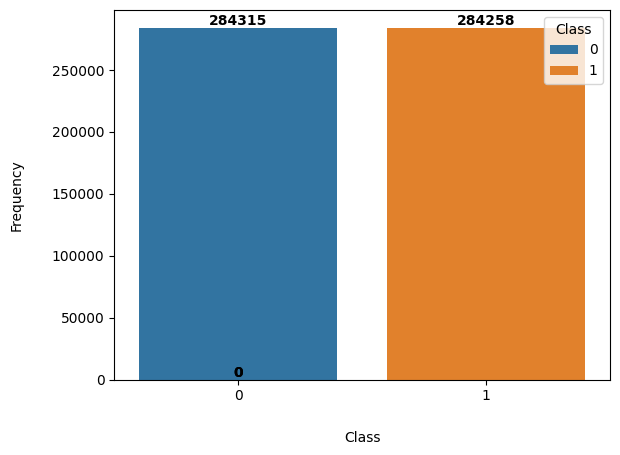

In [22]:
df_imba = X_res
df_imba['Class'] = y_res.values

ax = sns.countplot(data = df_imba, x = 'Class', hue = 'Class')

for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height())}',  # Nilai yang ditampilkan
        (p.get_x() + p.get_width() / 2, p.get_height()),  # Posisi anotasi
        ha='center',  # Posisi horizontal
        va='bottom',  # Posisi vertikal
        fontsize=10,  
        fontweight='bold',
        color='black'
    )

plt.xlabel('Class', labelpad = 20)
plt.ylabel('Frequency', labelpad = 20)
plt.show()

## Split Data

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_res.iloc[:,1:-1], y_res, test_size = 0.15)

In [24]:
X_train

,V3,V4,V7,V10,V11,V12,V14,V16,V17,V18
271795,1.683981,-2.065006,-0.150975,-1.741789,-1.133871,-0.446081,-0.114406,1.634694,-1.200573,0.695830
352027,-0.409877,1.190149,0.108886,-0.332392,2.036231,0.097862,-1.460515,1.075959,1.686526,0.764173
201461,-0.693496,-0.378778,-0.077794,-0.765899,-2.000501,-0.114060,0.878367,0.386143,-0.308702,-0.475639
69373,0.239206,-1.050163,-0.864259,1.398303,1.551743,-0.153110,-0.177143,-0.696578,0.717623,-0.110301
371135,0.086263,0.569701,0.214478,0.291721,-0.574649,0.449326,-0.370801,0.422994,-0.780820,-0.181000
...,...,...,...,...,...,...,...,...,...,...
424050,-0.892934,1.318011,0.251556,-2.198293,0.759009,-1.024515,-3.953616,1.190445,5.625232,1.664611
398377,-1.739227,2.081425,-0.435168,-4.613687,1.274359,-2.669205,-4.031965,-2.753471,-4.382546,-1.873689
62417,0.443888,0.158483,0.476060,-0.601063,-0.995755,-1.071609,1.052268,0.193499,-0.144737,0.162204
446010,-0.070252,1.265762,3.083228,0.903221,0.806954,-0.951555,-0.314995,0.748619,-1.318694,0.343499


# Modeling

## Random Forest

In [25]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [26]:
model_rf = RandomForestClassifier(n_estimators = 50, max_depth = 30, criterion = 'entropy', min_samples_split = 5)
model_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=30, min_samples_split=5,
                       n_estimators=50)

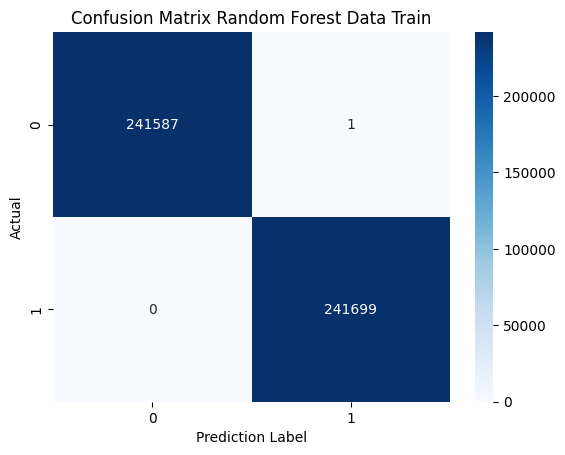

In [27]:
prediction_train = model_rf.predict(X_train)
class_label = df.Class.unique()
confusionMatrix = pd.DataFrame(confusion_matrix(y_train, prediction_train), index = class_label, columns = class_label)

sns.heatmap(confusionMatrix, cmap = plt.cm.Blues, fmt = 'd', annot = True)
plt.title("Confusion Matrix Random Forest Data Train")
plt.xlabel("Prediction Label")
plt.ylabel("Actual")
plt.show()

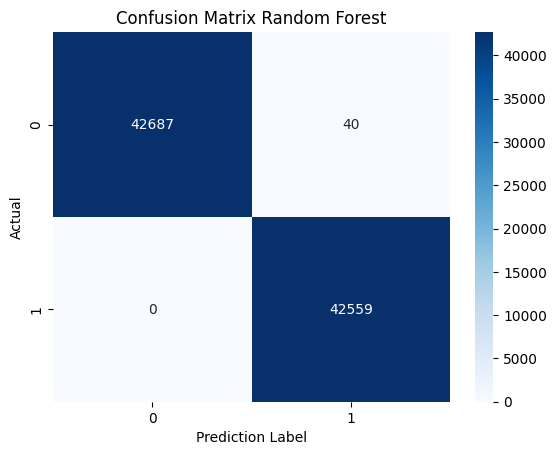

In [28]:
prediction = model_rf.predict(X_test)
class_label = df.Class.unique()
confusionMatrix = pd.DataFrame(confusion_matrix(y_test, prediction), index = class_label, columns = class_label)

sns.heatmap(confusionMatrix, cmap = plt.cm.Blues, fmt = 'd', annot = True)
plt.title("Confusion Matrix Random Forest")
plt.xlabel("Prediction Label")
plt.ylabel("Actual")
plt.show()

In [29]:
target_names = [f"{label}" for label in class_label]

print(classification_report(y_test, prediction, target_names = target_names, digits = 4))

              precision    recall  f1-score   support

           0     1.0000    0.9991    0.9995     42727
           1     0.9991    1.0000    0.9995     42559

    accuracy                         0.9995     85286
   macro avg     0.9995    0.9995    0.9995     85286
weighted avg     0.9995    0.9995    0.9995     85286



In [36]:
with open("rf.pkl", "wb") as model_file:
    joblib.dump(model_rf, model_file, compress = 3)

## C-LSTM

In [30]:
print("X_train shape ",X_train.shape)
print("X_test shape ",X_test.shape)

X_train shape  (483287, 10)
X_test shape  (85286, 10)


In [31]:
X_train = np.array(X_train)
X_train = X_train[int(X_train.shape[0] * 0.2):]
X_test = np.array(X_test)

y_train = np.array(y_train)
y_train = y_train[int(y_train.shape[0] * 0.2):]
y_test = np.array(y_test)

X_val = X_train[:int(X_train.shape[0] * 0.2)]
y_val = y_train[:int(y_train.shape[0] * 0.2)]

In [32]:
X_train_deep = X_train.reshape((X_train.shape[0], X_train.shape[1], 1, 1))
X_val_deep = X_val.reshape((X_val.shape[0], X_val.shape[1], 1, 1))
X_test_deep = X_test.reshape((X_test.shape[0], X_test.shape[1], 1, 1))

In [33]:
print("X_train reshape ",X_train_deep.shape)
print("X_val reshape ",X_val_deep.shape)
print("X_test reshape ",X_test_deep.shape)

X_train reshape  (386630, 10, 1, 1)
X_val reshape  (77326, 10, 1, 1)
X_test reshape  (85286, 10, 1, 1)


In [34]:
optimizers = tf.keras.optimizers.legacy.Adam(lr = 0.0001)

C:\Users\MSI-GAMING\anaconda3\envs\credit_fraud\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [35]:
model_clstm = Sequential([
    Conv1D(filters = 256, kernel_size = 5, activation = 'relu', padding = 'same', input_shape = (10,1)),
    Dropout(0.033),
    MaxPool1D(pool_size = 2),
    Conv1D(128, activation = 'relu', kernel_size = 3, padding = 'same'),
    Dropout(0.013),
    MaxPool1D(pool_size = 2),
    LSTM(units = 64, return_sequences = True),
    Dropout(0.003),
    LSTM(units = 32),
    Flatten(),
    Dense(units = 256, activation = 'relu'),
    Dropout(0.025),
    Dense(units = 128, activation = 'relu'),
    Dropout(0.015),
    Dense(units = 64, activation = 'relu'),
    Dropout(0.005),
    Dense(units = 32, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

model_clstm.compile(loss=keras.losses.binary_crossentropy, optimizer = optimizers, metrics = ['accuracy'])
model_clstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 10, 256)           1536      
                                                                 
 dropout (Dropout)           (None, 10, 256)           0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 5, 256)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 5, 128)            98432     
                                                                 
 dropout_1 (Dropout)         (None, 5, 128)            0         
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 2, 128)           0         
 1D)                                                    

In [41]:
early = EarlyStopping(monitor = "val_accuracy", patience = 5, min_delta = 0.001, mode = 'max', baseline = 0.995, verbose = 1)
checkpoint = ModelCheckpoint(filepath = "model_clstm.h5", patience = 5, monitor = "val_loss", baseline = 0.005, mode = 'min', 
                             save_best_olny = True, verbose = 1)

In [42]:
model_clstm.fit(X_train_deep, y_train, batch_size = 64, verbose = 1,
                validation_data = (X_val_deep, y_val),epochs = 100,
               callbacks = [checkpoint, early])

Epoch 1/100
6040/6042 [============================>.] - ETA: 0s - loss: 0.0376 - accuracy: 0.9881  
Epoch 1: saving model to model_clstm.h5
6042/6042 [==============================] - 120s 20ms/step - loss: 0.0376 - accuracy: 0.9881 - val_loss: 0.0217 - val_accuracy: 0.9950
Epoch 2/100
6042/6042 [==============================] - ETA: 0s - loss: 0.0314 - accuracy: 0.9903  
Epoch 2: saving model to model_clstm.h5
6042/6042 [==============================] - 119s 20ms/step - loss: 0.0314 - accuracy: 0.9903 - val_loss: 0.0204 - val_accuracy: 0.9937
Epoch 3/100
6038/6042 [============================>.] - ETA: 0s - loss: 0.0277 - accuracy: 0.9917  
Epoch 3: saving model to model_clstm.h5
6042/6042 [==============================] - 122s 20ms/step - loss: 0.0277 - accuracy: 0.9917 - val_loss: 0.0179 - val_accuracy: 0.9955
Epoch 4/100
6040/6042 [============================>.] - ETA: 0s - loss: 0.0242 - accuracy: 0.9928  
Epoch 4: saving model to model_clstm.h5
6042/6042 [=================

In [44]:
model_clstm = load_model("model_clstm.h5")

In [47]:
predict_clstm = model_clstm.predict(X_test_deep)

2666/2666 [==============================] - 19s 6ms/step


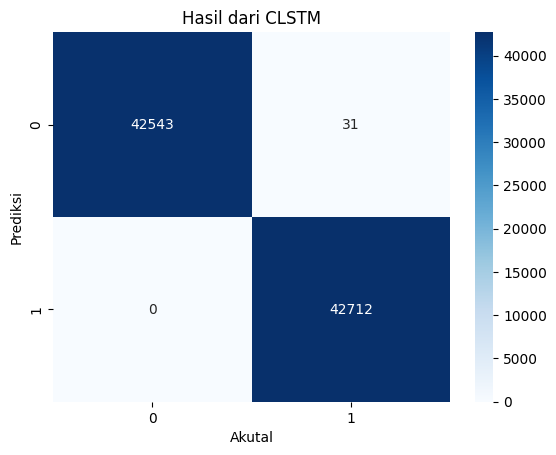

In [51]:
confsuion_matrix_clstm = pd.DataFrame(confusion_matrix(y_test, prediction), index = class_label, columns = class_label)

sns.heatmap(confsuion_matrix_clstm, cmap = plt.cm.Blues, fmt = 'd', annot = True)
plt.title("Hasil dari CLSTM")
plt.xlabel("Akutal")
plt.ylabel("Prediksi")
plt.show()